In [23]:
!pip install pandas
!pip install seaborn
!pip install sklearn

In [31]:
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import 

## Data Preprocessing

### Importing .csv file of DDoS Simulation exported from Wireshark

In [25]:
ddos_df = pd.read_csv('ddos-sim-definite.csv')
ddos_df

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,74.125.198.189,10.0.2.15,TLSv1.2,106,Application Data
1,2,0.000028,10.0.2.15,74.125.198.189,TCP,54,41596 > 443 [ACK] Seq=1 Ack=53 Win=65535 Len=0
2,3,25.559208,74.125.198.189,10.0.2.15,TLSv1.2,106,Application Data
3,4,25.559229,10.0.2.15,74.125.198.189,TCP,54,41596 > 443 [ACK] Seq=1 Ack=105 Win=65535 Len=0
4,5,30.576924,PcsCompu_55:da:e5,RealtekU_12:35:02,ARP,42,Who has 10.0.2.2? Tell 10.0.2.15
...,...,...,...,...,...,...,...
13408,13409,136.363761,RealtekU_12:35:02,Broadcast,ARP,60,Who has 71.27.35.84? Tell 10.0.2.2
13409,13410,136.363861,115.0.0.117,192.168.1.107,TCP,174,9100 > 80 [<None>] Seq=1 Win=512 Len=120 [TC...
13410,13411,136.364185,RealtekU_12:35:02,Broadcast,ARP,60,Who has 115.0.0.117? Tell 10.0.2.2
13411,13412,136.447659,99.49.199.208,192.168.1.107,TCP,174,9101 > 80 [<None>] Seq=1 Win=512 Len=120 [TC...


### Checking if there are any null values

In [26]:
ddos_df.isnull().sum()

No.            0
Time           0
Source         0
Destination    0
Protocol       0
Length         0
Info           0
dtype: int64

### Counting packets by protocol

In [27]:
protocol_count = ddos_df.groupby('Protocol').Source.count()

protocol_count

Protocol
ARP        6156
DNS           2
TCP        7243
TLSv1.2       9
TLSv1.3       3
Name: Source, dtype: int64

### Grabbing 'Protocol' column from the DataFrame except values containing 'ARP'

In [28]:
indexNames = ddos_df[ddos_df['Protocol'] == 'ARP'].index

ddos_df.drop(indexNames, inplace=True)

ddos_df_protocol = ddos_df['Protocol']

ddos_df_protocol

0        TLSv1.2
1            TCP
2        TLSv1.2
3            TCP
6        TLSv1.2
          ...   
13403        TCP
13405        TCP
13406        TCP
13409        TCP
13411        TCP
Name: Protocol, Length: 7257, dtype: object

In [36]:
ddos_df_ptcl_time = ddos_df[['Time', 'Protocol']]

ddos_df_ptcl_time

,Time,Protocol
0,0.000000,TLSv1.2
1,0.000028,TCP
2,25.559208,TLSv1.2
3,25.559229,TCP
6,50.699836,TLSv1.2
...,...,...
13403,136.263878,TCP
13405,136.362741,TCP
13406,136.363110,TCP
13409,136.363861,TCP


### Histogram plot of protocols in packets

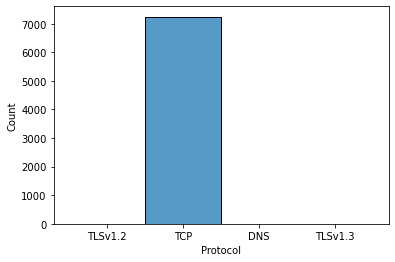

In [29]:
sns.histplot(data=ddos_df_protocol, bins=30, palette='flare', hue_order=ddos_df_protocol.unique())

## Attack classification: yes/no

In [37]:
# TCP and ARP packets sent vs. period of time, or packets/time rate

X = ddos_df_ptcl_time
y = ddos_df_protocol

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

tcp_attack_classifier = SVC()
tcp_attack_classifier.fit(X, y)

ValueError: could not convert string to float: 'TLSv1.2'